<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#QC-Thresholds" data-toc-modified-id="QC-Thresholds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QC Thresholds</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#Load-expression-data" data-toc-modified-id="Load-expression-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load expression data</a></span></li><li><span><a href="#Load-QC-data" data-toc-modified-id="Load-QC-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load QC data</a></span></li><li><span><a href="#Load-metadata" data-toc-modified-id="Load-metadata-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load metadata</a></span></li><li><span><a href="#Remove-extra-sample-rows" data-toc-modified-id="Remove-extra-sample-rows-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Remove extra sample rows</a></span></li></ul></li><li><span><a href="#Check-statistics" data-toc-modified-id="Check-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check statistics</a></span><ul class="toc-item"><li><span><a href="#FastQC-stats" data-toc-modified-id="FastQC-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>FastQC stats</a></span></li><li><span><a href="#Number-of-aligned-reads" data-toc-modified-id="Number-of-aligned-reads-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Number of aligned reads</a></span></li></ul></li><li><span><a href="#Examine-Global-Correlations" data-toc-modified-id="Examine-Global-Correlations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine Global Correlations</a></span><ul class="toc-item"><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Metadata-Curation" data-toc-modified-id="Metadata-Curation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata Curation</a></span><ul class="toc-item"><li><span><a href="#BioProject-counts-of-passing-metadata" data-toc-modified-id="BioProject-counts-of-passing-metadata-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BioProject counts of passing metadata</a></span></li><li><span><a href="#BioProject-counts-of-all-metadata" data-toc-modified-id="BioProject-counts-of-all-metadata-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BioProject counts of all metadata</a></span></li></ul></li><li><span><a href="#Correlations-between-replicates" data-toc-modified-id="Correlations-between-replicates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li><li><span><a href="#Drop-Samples-with-no-replicates" data-toc-modified-id="Drop-Samples-with-no-replicates-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Drop Samples with no replicates</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Save-final-datasets" data-toc-modified-id="Save-final-datasets-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save final datasets</a></span></li></ul></div>

<font size="4">This is a template notebook for performing preliminary quality control on your organism's expression data.</font>

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
sns.set_style('ticks')

# Setup

## QC Thresholds

In [3]:
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs

<font size="4">Show files in the data directory</font>

In [4]:
data_dir = path.join('..','data','raw_data')
os.listdir(data_dir)

['multiqc_report.html',
 '.DS_Store',
 'counts.csv',
 'Pseudomonas_aeruginosa_2020-08-20.tsv',
 'log_tpm.csv',
 'multiqc_stats.tsv']

<font size="4">Enter name of curated metadata file here</font>

In [5]:
metadata_file = "Pseudomonas_aeruginosa_2020-08-20.tsv" # Enter metadata filename here


## Load expression data

In [6]:
DF_log_tpm = pd.read_csv(path.join(data_dir,'log_tpm.csv'),index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 5572
Number of samples: 903


In [7]:
DF_log_tpm.head()

,ERX1517773,ERX1517774,ERX2068556,ERX2068557,ERX2068558,ERX2068559,ERX2068560,ERX2068561,ERX2195929,ERX2195930,...,SRX8639791,SRX8639792,SRX8639793,SRX8639794,SRX8639795,SRX8639796,SRX8639797,SRX8639798,SRX8639799,SRX8639800
0,6.277878,6.431313,8.423015,8.460711,8.356249,8.371609,8.466484,8.420668,8.021153,8.120537,...,8.841838,8.954779,8.644161,8.642288,8.718668,8.534275,8.834169,8.256881,8.803165,8.301345
1,7.725987,7.732565,8.215291,8.124176,7.764701,8.050971,8.155383,7.750507,8.692497,8.747597,...,8.414440,8.196319,7.440182,7.325033,7.283925,7.346756,8.327709,8.035659,7.907329,7.999155
2,6.968408,7.246304,8.588732,8.629125,8.216899,8.464550,8.723472,8.289552,7.765216,7.946322,...,8.488681,8.245240,8.615917,8.506611,8.789880,8.646338,8.275263,8.433264,8.624029,8.320483
3,7.640846,7.781438,8.581618,8.530471,8.293845,8.523099,8.631292,8.271958,8.359466,8.351538,...,8.049250,7.949448,8.211747,8.115940,8.107211,8.115509,7.975445,7.990854,7.698843,7.875818
4,5.747017,5.740594,6.865497,6.682624,6.796981,7.039418,6.772637,6.907528,6.125883,6.128164,...,7.543207,7.629568,4.375213,4.610255,4.536264,4.522592,7.777002,7.732781,8.628060,7.861753


## Load QC data
<font size="4">There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.</font>

In [8]:
DF_qc_stats = pd.read_csv(path.join(data_dir,'multiqc_stats.tsv'),index_col=0, sep='\t')
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 903


In [9]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
ERX1517773,5354499,2131165,28019,1171544,0,0,0,0,982,0,...,5358269,401870175,823568,400904070,0.240402,0.1328,0.3343,0.5329,0.0,0.0
ERX1517774,4682908,1838787,14657,1025970,0,0,0,0,168,0,...,4685736,351430200,617780,350685616,0.211873,0.1445,0.3340,0.5215,0.0,0.0
ERX2068556,7378583,3121617,10583,351379,0,0,0,0,6444,0,...,7411903,558658864,3446024,553924342,0.847480,0.2033,0.2406,0.5560,0.0,0.0
ERX2068557,11863531,5447214,25131,544806,0,0,0,0,14566,0,...,11921761,898213641,5829631,890256401,0.885896,0.1868,0.2432,0.5700,0.0,0.0
ERX2068558,21718678,7910385,66686,1366378,0,0,0,0,32483,0,...,21817611,1647172687,2630731,1642908376,0.258887,0.2278,0.2149,0.5573,0.0,0.0


## Load metadata

In [10]:
DF_metadata = pd.read_csv(path.join(data_dir,metadata_file),index_col=0,sep='\t')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 903


,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,InsertDev,SRA ID,Biosample,GEO Series,GEO Sample,PMID,biosample_strain,biosample_genotype,R1,R2
Experiment,,,,,,,,,,,,,,,,,,,,,
ERX1517773,6/9/16 9:47,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,Illumina MiSeq,...,50.0,2619554.0,5219789.0,NaN,NaN,NaN,NaN,wild type genotype,NaN,NaN
ERX1517774,6/9/16 9:47,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,Illumina MiSeq,...,50.0,2619555.0,5219791.0,NaN,NaN,NaN,NaN,gbuA,NaN,NaN
ERX2068556,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,30.0,6209298.0,9590291.0,NaN,NaN,NaN,NaN,mexZ,NaN,NaN
ERX2068557,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,30.0,6209299.0,9590292.0,NaN,NaN,NaN,NaN,mexZ,NaN,NaN
ERX2068558,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,30.0,6209300.0,9590293.0,NaN,NaN,NaN,NaN,mexZ,NaN,NaN


## Remove extra sample rows

In [11]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [12]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

# Check statistics

<font size="4">From here, create a new spreadsheet where you can flag samples based on various QC statistics</font>


## FastQC stats

In [13]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

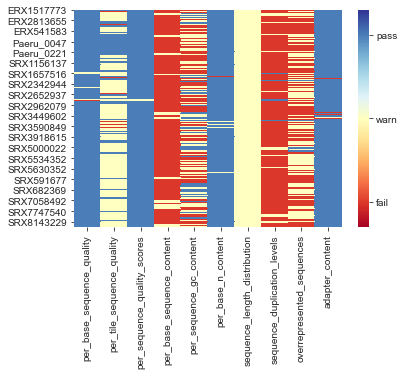

In [14]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [15]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [16]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
ERX1517773,pass,pass,fail,pass
ERX1517774,pass,pass,fail,pass
SRX127960,pass,pass,warn,pass
SRX1657515,warn,pass,pass,pass
SRX1657516,warn,pass,pass,pass
...,...,...,...,...
SRX5728479,pass,pass,warn,pass
SRX5728480,pass,pass,warn,pass
SRX5728481,pass,pass,warn,pass
SRX5728482,pass,pass,warn,pass


<font size="4">Mark samples as failed.</font>

In [17]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

## Number of aligned reads

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

In [18]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

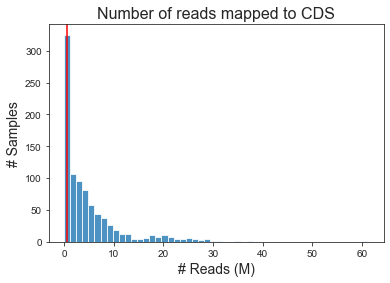

In [19]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [20]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
SRX127960,25931,0,0,25931,0,0,0,0,0,0,...,25971,5046498,345358,4672494,7.411159,0.0000,0.0000,0.0000,0.0,0.0
SRX127959,39950,0,0,39950,0,0,0,0,0,0,...,40018,4787641,217947,4568921,4.568429,0.0000,0.0000,0.0000,0.0,0.0
SRX5000032,7580059,120,13276,7554344,0,0,0,0,8,0,...,7650503,764785042,17471141,743657593,2.762534,0.5192,0.0027,0.4780,0.0,0.0
SRX5000029,6486400,134,12017,6462531,0,0,0,0,32,0,...,6532134,652160578,13195505,635872205,2.497602,0.5066,0.0036,0.4898,0.0,0.0
SRX5000019,7316592,152,7782,7301037,0,0,0,0,22,0,...,7369205,735192681,15407031,716326073,2.566213,0.5058,0.0052,0.4889,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRX8487076,567836,443040,1318,23476,0,0,0,0,887,0,...,568904,82969113,183604,82641992,0.394268,0.2194,0.2157,0.5648,0.0,0.0
Paeru_0270,7034943,446867,5553,6207091,0,0,0,0,7249,0,...,7044433,1063709383,1330561,1057762347,0.559085,0.2269,0.2349,0.5382,0.0,0.0
Paeru_0286,16243149,473365,20214,15156811,0,0,0,0,1082,0,...,16265928,1642858728,1507232,1631912854,0.666270,0.3390,0.1701,0.4908,0.0,0.0
SRX2662720,15722451,477390,6693088,404294,0,0,0,0,2545,0,...,16312725,831948975,42161907,783094477,5.872295,0.4744,0.0384,0.4872,0.0,0.0


<font size="4">Mark samples as failed.</font>

In [21]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [22]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .3

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  6


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

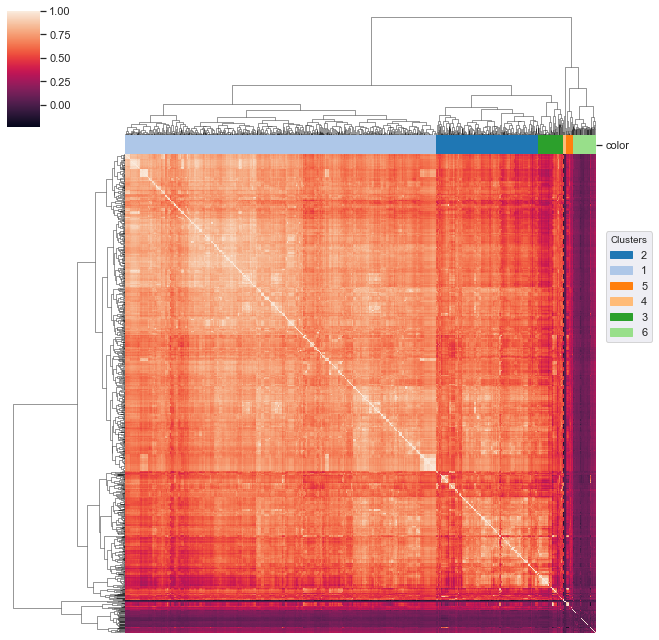

In [23]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})



<font size="4">Select clusters to remove.</font>

In [24]:
#indicate which clusters you want to remove

remove_clst = [4,6]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index

In [25]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [26]:
DF_metadata.head()

,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,GEO Series,GEO Sample,PMID,biosample_strain,biosample_genotype,R1,R2,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation
ERX1517773,6/9/16 9:47,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,Illumina MiSeq,...,NaN,NaN,NaN,NaN,wild type genotype,NaN,NaN,False,True,True
ERX1517774,6/9/16 9:47,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,Illumina MiSeq,...,NaN,NaN,NaN,NaN,gbuA,NaN,NaN,False,True,True
ERX2068556,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,NaN,NaN,NaN,mexZ,NaN,NaN,True,True,True
ERX2068557,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,NaN,NaN,NaN,mexZ,NaN,NaN,True,True,True
ERX2068558,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,NaN,NaN,NaN,mexZ,NaN,NaN,True,True,True


# Remove failed samples

In [27]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']


In [28]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

In [29]:
DF_metadata_passed

,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,GEO Series,GEO Sample,PMID,biosample_strain,biosample_genotype,R1,R2,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation
ERX2068556,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,NaN,NaN,NaN,mexZ,NaN,NaN,True,True,True
ERX2068557,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,NaN,NaN,NaN,mexZ,NaN,NaN,True,True,True
ERX2068558,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,NaN,NaN,NaN,mexZ,NaN,NaN,True,True,True
ERX2068559,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,NaN,NaN,NaN,wild type genotype,NaN,NaN,True,True,True
ERX2068560,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,NaN,NaN,NaN,wild type genotype,NaN,NaN,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRX8639796,7/1/20 16:45,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,SINGLE,ILLUMINA,NextSeq 550,...,GSE153546,GSM4646942,NaN,PAO1,NaN,NaN,NaN,True,True,True
SRX8639797,7/1/20 16:45,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,SINGLE,ILLUMINA,NextSeq 550,...,GSE153546,GSM4646943,NaN,PAO1,NaN,NaN,NaN,True,True,True
SRX8639798,7/1/20 16:45,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,SINGLE,ILLUMINA,NextSeq 550,...,GSE153546,GSM4646944,NaN,PAO1,NaN,NaN,NaN,True,True,True
SRX8639799,7/1/20 16:45,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,SINGLE,ILLUMINA,NextSeq 550,...,GSE153546,GSM4646945,NaN,PAO1,NaN,NaN,NaN,True,True,True


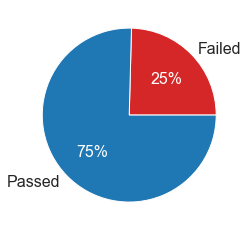

In [30]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')
    
    

# Metadata Curation

<font size=4>The following sections can only be run after metadata curation is complete. To enable metadata curation, the code in this section sorts data by BioProject. </font>

## BioProject counts of passing metadata

In [31]:
DF_metadata_passed.BioProject.value_counts().sort_values(ascending=False)

PRJNA579575    24
PRJEB6998      24
PRJNA527727    19
PRJNA353241    17
PRJNA643216    16
               ..
PRJNA257669     1
PRJNA525278     1
PRJNA213568     1
PRJNA504405     1
PRJNA311263     1
Name: BioProject, Length: 91, dtype: int64

## BioProject counts of all metadata

In [32]:
DF_metadata.BioProject.value_counts().sort_values(ascending=False)

PRJNA527727    40
PRJNA421309    30
PRJNA430510    29
PRJEB6998      26
PRJNA579575    24
               ..
PRJEB14322      2
PRJNA504405     1
PRJNA311263     1
PRJNA213568     1
PRJNA252432     1
Name: BioProject, Length: 108, dtype: int64

# Correlations between replicates

<font size=4> First, get a full sample name </font>

In [34]:
DF_log_tpm.head()

,ERX2068556,ERX2068557,ERX2068558,ERX2068559,ERX2068560,ERX2068561,ERX2195929,ERX2195930,ERX2195931,ERX2195932,...,SRX8639790,SRX8639791,SRX8639792,SRX8639793,SRX8639794,SRX8639795,SRX8639796,SRX8639797,SRX8639798,SRX8639800
0,8.423015,8.460711,8.356249,8.371609,8.466484,8.420668,8.021153,8.120537,8.762117,8.853831,...,8.166767,8.841838,8.954779,8.644161,8.642288,8.718668,8.534275,8.834169,8.256881,8.301345
1,8.215291,8.124176,7.764701,8.050971,8.155383,7.750507,8.692497,8.747597,9.043955,9.010918,...,8.046182,8.414440,8.196319,7.440182,7.325033,7.283925,7.346756,8.327709,8.035659,7.999155
2,8.588732,8.629125,8.216899,8.464550,8.723472,8.289552,7.765216,7.946322,8.314547,8.359824,...,8.472741,8.488681,8.245240,8.615917,8.506611,8.789880,8.646338,8.275263,8.433264,8.320483
3,8.581618,8.530471,8.293845,8.523099,8.631292,8.271958,8.359466,8.351538,8.790285,8.724996,...,8.038738,8.049250,7.949448,8.211747,8.115940,8.107211,8.115509,7.975445,7.990854,7.875818
4,6.865497,6.682624,6.796981,7.039418,6.772637,6.907528,6.125883,6.128164,6.262267,6.454072,...,7.578573,7.543207,7.629568,4.375213,4.610255,4.536264,4.522592,7.777002,7.732781,7.861753


In [35]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [36]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project_name'].str.cat(DF_metadata_passed.loc[:,'condition_name'],sep=':')

In [37]:
DF_metadata_passed.head()

,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,temperature,pH,growth_phase,OD,additional_notes,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation,passed_similar_replicates,passed_number_replicates
Experiment,,,,,,,,,,,,,,,,,,,,,
ERX2068556,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,mid-log,600,Inactivation of mexZ is known to lead to the o...,NaN,True,True,True,True,True
ERX2068557,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,mid-log,600,Inactivation of mexZ is known to lead to the o...,NaN,True,True,True,True,True
ERX2068558,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,mid-log,600,Inactivation of mexZ is known to lead to the o...,NaN,True,True,True,True,True
ERX2068559,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,mid-log,600,Inactivation of mexZ is known to lead to the o...,NaN,True,True,True,True,True
ERX2068560,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,mid-log,600,Inactivation of mexZ is known to lead to the o...,NaN,True,True,True,True,True


## Compute Pearson R Score

<font size="4">Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. </font>

In [38]:
from tqdm.notebook import tqdm
import itertools
from scipy import stats
import numpy as np

In [39]:
DF_metadata_passed.head()


,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,temperature,pH,growth_phase,OD,additional_notes,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation,passed_similar_replicates,passed_number_replicates
Experiment,,,,,,,,,,,,,,,,,,,,,
ERX2068556,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,mid-log,600,Inactivation of mexZ is known to lead to the o...,NaN,True,True,True,True,True
ERX2068557,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,mid-log,600,Inactivation of mexZ is known to lead to the o...,NaN,True,True,True,True,True
ERX2068558,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,mid-log,600,Inactivation of mexZ is known to lead to the o...,NaN,True,True,True,True,True
ERX2068559,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,mid-log,600,Inactivation of mexZ is known to lead to the o...,NaN,True,True,True,True,True
ERX2068560,8/22/18 9:38,208964.0,Pseudomonas aeruginosa PAO1,287,1236.0,208964.0,Pseudomonas aeruginosa,PAIRED,ILLUMINA,NextSeq 500,...,NaN,mid-log,600,Inactivation of mexZ is known to lead to the o...,NaN,True,True,True,True,True


In [40]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

In [41]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.98


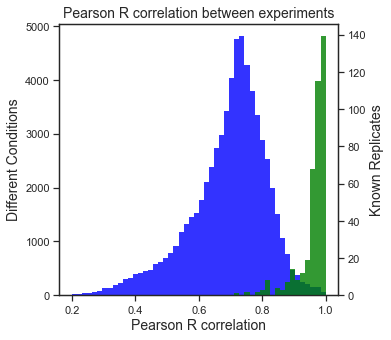

In [42]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))


In [43]:
#pearson r cutoff for replicates
rcutoff = 0.95

#for each sample get max correlation between replicates
dissimilar = []
for idx, grp in DF_metadata_passed.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)
DF_metadata['passed_replicate_corr'] = ~DF_metadata.index.isin(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)

## Drop Samples with no replicates

In [44]:
cond_counts = DF_metadata_passed.condition_name.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
drop_conds

Index([], dtype='object')

In [45]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition_name.isin(drop_conds)

In [46]:
DF_metadata_passed = DF_metadata_passed[DF_metadata_passed['passed_number_replicates']]

# Remove failed samples

In [47]:
qc_columns = ['passed_number_replicates','passed_similar_replicates']

In [48]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

In [50]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

# Save final datasets

In [59]:
# DF_log_tpm_final.to_csv(os.path.join(data_dir,'log_tpm_OVERALL_qc1.csv'))
# DF_metadata_final.to_csv(os.path.join(data_dir,'metadata_OVERALL_qc1.csv'))